### This solution is based on ideas of [Gunes Evitan](https://www.kaggle.com/gunesevitan) and [Amer Wafiy](https://www.kaggle.com/amerwafiy)

# Imports

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# Data Input
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
sub_example = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [3]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
342,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
519,520,0,3,"Pavlovic, Mr. Stefo",male,32.0,0,0,349242,7.8958,NaN,S
809,810,1,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",female,33.0,1,0,113806,53.1000,E8,S
274,275,1,3,"Healy, Miss. Hanora ""Nora""",female,NaN,0,0,370375,7.7500,NaN,Q
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S


In [4]:
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
131,1023,1,"Gracie, Col. Archibald IV",male,53.0,0,0,113780,28.5000,C51,C
19,911,3,"Assaf Khalil, Mrs. Mariana (Miriam"")""",female,45.0,0,0,2696,7.2250,NaN,C
326,1218,2,"Becker, Miss. Ruth Elizabeth",female,12.0,2,1,230136,39.0000,F4,S
110,1002,2,"Stanton, Mr. Samuel Ward",male,41.0,0,0,237734,15.0458,NaN,C
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
test.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Explorative Data Analysis

In [11]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
703,704,0,3,"Gallagher, Mr. Martin",male,25.0,0,0,36864,7.7417,NaN,Q
453,454,1,1,"Goldenberg, Mr. Samuel L",male,49.0,1,0,17453,89.1042,C92,C
300,301,1,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,NaN,0,0,9234,7.7500,NaN,Q
436,437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.3750,NaN,S
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

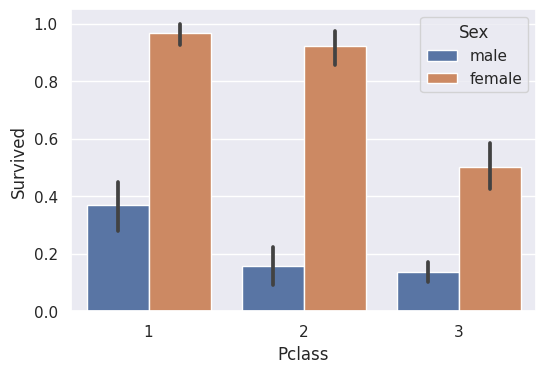

In [12]:
# Pclass - 1 = 1st, 2 = 2nd, 3 = 3rd
plt.figure(dpi=100)
sns.barplot(x='Pclass',y='Survived',data=train,hue='Sex')

<AxesSubplot:xlabel='Age', ylabel='Count'>

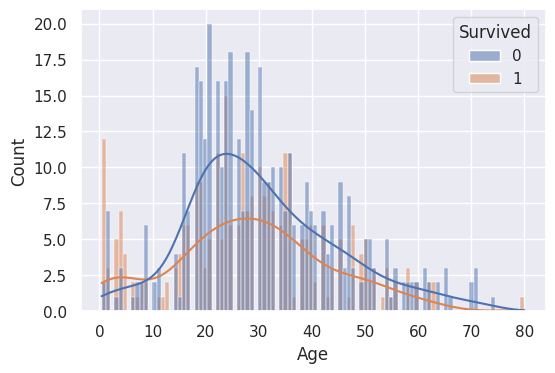

In [13]:
# Age - 0 to 76
plt.figure(dpi=100)
sns.histplot(data=train,x='Age',bins=100,kde=True,hue='Survived')

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

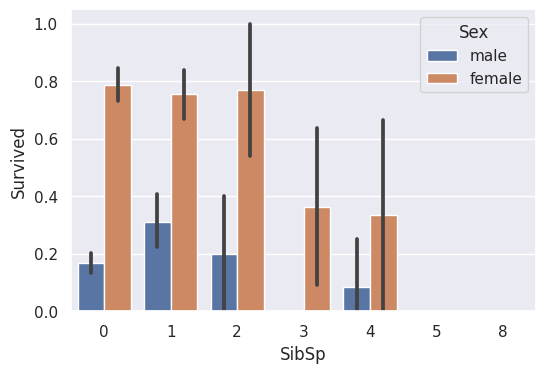

In [14]:
# SibSp - number of siblings / spouses aboard the Titanic
plt.figure(dpi=100)
sns.barplot(x='SibSp',y='Survived',data=train,hue='Sex')

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

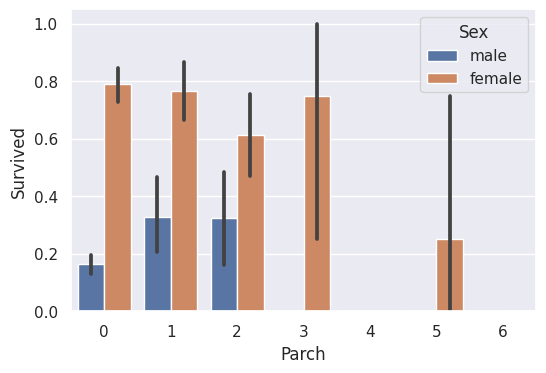

In [15]:
# Parch - number of parents / children aboard the Titanic
plt.figure(dpi=100)
sns.barplot(x='Parch',y='Survived',data=train,hue='Sex')

<AxesSubplot:xlabel='Fare', ylabel='Count'>

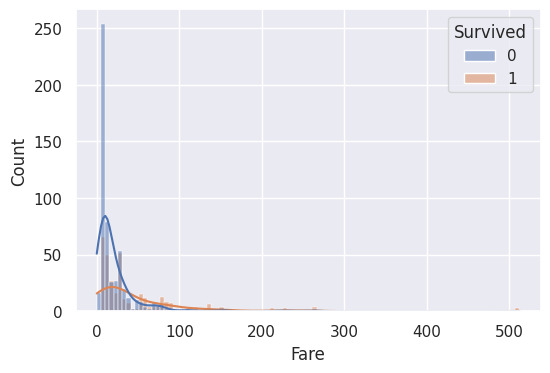

In [16]:
# Fare - 0 to 512
plt.figure(dpi=100)
sns.histplot(data=train,x='Fare',bins=100,kde=True,hue='Survived')

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

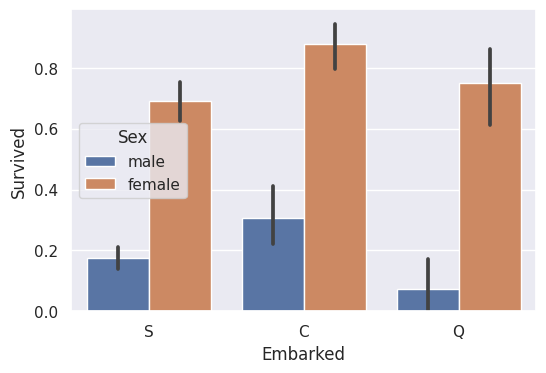

In [17]:
# Embarked - C = Cherbourg, Q = Queenstown, S = Southampton
plt.figure(dpi=100)
sns.barplot(x='Embarked',y='Survived',data=train,hue='Sex')

<AxesSubplot:>

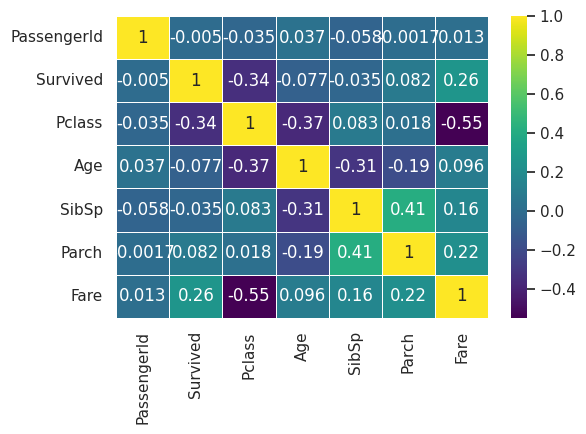

In [18]:
# Correlation between features
plt.figure(dpi=100)
sns.heatmap(train.corr(),linewidth=0.5,annot=True,cmap='viridis')

# Feature Engineering

In [19]:
# Combining Train Test Data for simplicity
train_test_data = pd.concat([train,test],axis=0,ignore_index=True)
train_test_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [20]:
# Age - Filling na
train_test_data['Age'] = train_test_data.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
train_test_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,25.0,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,25.0,0,0,359309,8.0500,NaN,S


In [21]:
# Deck
# Creating Deck column from the first letter of the Cabin column (M stands for Missing)
train_test_data['Deck'] = train_test_data['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

# Passenger in the T deck is changed to A
idx = train_test_data[train_test_data['Deck'] == 'T'].index
train_test_data.loc[idx, 'Deck'] = 'A'

# A, B and C decks are labeled as ABC because all of them have only 1st class passengers
# D and E decks are labeled as DE because both of them have similar passenger class distribution and same survival rate
# F and G decks are labeled as FG because of the same reason above
# M deck doesn't need to be grouped with other decks because it is very different from others and has the lowest survival rate.
train_test_data['Deck'] = train_test_data['Deck'].replace(['A', 'B', 'C'], 'ABC')
train_test_data['Deck'] = train_test_data['Deck'].replace(['D', 'E'], 'DE')
train_test_data['Deck'] = train_test_data['Deck'].replace(['F', 'G'], 'FG')

train_test_data['Deck'].value_counts()

M      1014
ABC     182
DE       87
FG       26
Name: Deck, dtype: int64

In [22]:
# Name
train_test_data['Title'] = train_test_data['Name'].apply(lambda name: name.split(', ')[1].split('.')[0])
train_test_data['Title'] =  train_test_data['Title'].replace(\
                            to_replace=['Rev','Dr','Col','Mlle','Major','Ms','Lady','Sir','Mme','Don',\
                            'Capt','the Countess','Jonkheer','Dona'],value='Other')
train_test_data['Title'].value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
Other      34
Name: Title, dtype: int64

In [23]:
# Family Size
train_test_data['FamilySize'] = train_test_data['SibSp'] + train_test_data['Parch'] + 1
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
train_test_data['Family_Size_Grouped'] = train_test_data['FamilySize'].map(family_map)
train_test_data['Family_Size_Grouped'].value_counts()

Alone     790
Small     437
Medium     47
Large      35
Name: Family_Size_Grouped, dtype: int64

In [24]:
# Ticket Type
train_test_data['TicketType'] = train_test_data['Ticket'].str.isnumeric()
train_test_data['TicketType'] =  train_test_data['TicketType'].replace(to_replace=True,value=1)
train_test_data['TicketType'] =  train_test_data['TicketType'].replace(to_replace=False,value=0)
train_test_data['TicketType'].value_counts()

1    957
0    352
Name: TicketType, dtype: int64

In [25]:
# Ticket Frequency
train_test_data['Ticket_Frequency'] = train_test_data.groupby('Ticket')['Ticket'].transform('count')
train_test_data['Ticket_Frequency'].value_counts()

1     713
2     264
3     147
4      64
5      35
7      35
6      24
8      16
11     11
Name: Ticket_Frequency, dtype: int64

In [26]:
# Fare - Filling na
train_test_data['Fare'].fillna(value=train_test_data['Fare'].median(),inplace=True)

In [27]:
# Embarked - Filling na
train_test_data['Embarked'].value_counts()
train_test_data['Embarked'].fillna(value='S',inplace=True)

In [28]:
# Drop useless columns
train_test_data.drop(['PassengerId','Survived','Name','SibSp','Parch','Ticket','Cabin','FamilySize'],axis=1,inplace=True)

In [29]:
train_test_data.isnull().sum()

Pclass                 0
Sex                    0
Age                    0
Fare                   0
Embarked               0
Deck                   0
Title                  0
Family_Size_Grouped    0
TicketType             0
Ticket_Frequency       0
dtype: int64

In [30]:
train_test_data

,Pclass,Sex,Age,Fare,Embarked,Deck,Title,Family_Size_Grouped,TicketType,Ticket_Frequency
0,3,male,22.0,7.2500,S,M,Mr,Small,0,1
1,1,female,38.0,71.2833,C,ABC,Mrs,Small,0,2
2,3,female,26.0,7.9250,S,M,Miss,Alone,0,1
3,1,female,35.0,53.1000,S,ABC,Mrs,Small,1,2
4,3,male,35.0,8.0500,S,M,Mr,Alone,1,1
...,...,...,...,...,...,...,...,...,...,...
1304,3,male,25.0,8.0500,S,M,Mr,Alone,0,1
1305,1,female,39.0,108.9000,C,ABC,Other,Alone,0,3
1306,3,male,38.5,7.2500,S,M,Mr,Alone,0,1
1307,3,male,25.0,8.0500,S,M,Mr,Alone,1,1


In [31]:
# Binning Continuous Features
train_test_data['Fare'] = pd.qcut(train_test_data['Fare'], 13, labels=np.arange(1,14))
train_test_data['Fare'] = train_test_data['Fare'].astype(dtype=int)
train_test_data['Age'] = pd.qcut(train_test_data['Age'], 10, labels=np.arange(1,11))
train_test_data['Age'] = train_test_data['Age'].astype(dtype=int)

In [32]:
train_test_data['Fare']

0        1
1       12
2        4
3       11
4        4
        ..
1304     4
1305    13
1306     1
1307     4
1308     8
Name: Fare, Length: 1309, dtype: int64

In [33]:
train_test_data['Age']

0       3
1       8
2       5
3       8
4       8
       ..
1304    4
1305    8
1306    8
1307    4
1308    4
Name: Age, Length: 1309, dtype: int64

In [34]:
train_test_data

,Pclass,Sex,Age,Fare,Embarked,Deck,Title,Family_Size_Grouped,TicketType,Ticket_Frequency
0,3,male,3,1,S,M,Mr,Small,0,1
1,1,female,8,12,C,ABC,Mrs,Small,0,2
2,3,female,5,4,S,M,Miss,Alone,0,1
3,1,female,8,11,S,ABC,Mrs,Small,1,2
4,3,male,8,4,S,M,Mr,Alone,1,1
...,...,...,...,...,...,...,...,...,...,...
1304,3,male,4,4,S,M,Mr,Alone,0,1
1305,1,female,8,13,C,ABC,Other,Alone,0,3
1306,3,male,8,1,S,M,Mr,Alone,0,1
1307,3,male,4,4,S,M,Mr,Alone,1,1


In [35]:
# Get dummies 
dummies = pd.get_dummies(train_test_data[['Sex','Embarked','Deck','Title','Family_Size_Grouped']],drop_first=True)
dummies

,Sex_male,Embarked_Q,Embarked_S,Deck_DE,Deck_FG,Deck_M,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Family_Size_Grouped_Large,Family_Size_Grouped_Medium,Family_Size_Grouped_Small
0,1,0,1,0,0,1,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,1,0,0,1,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,0,0,1
4,1,0,1,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1,0,1,0,0,1,0,1,0,0,0,0,0
1305,0,0,0,0,0,0,0,0,0,1,0,0,0
1306,1,0,1,0,0,1,0,1,0,0,0,0,0
1307,1,0,1,0,0,1,0,1,0,0,0,0,0


In [36]:
train_test_data = train_test_data.drop(['Sex','Embarked','Deck','Title','Family_Size_Grouped'],axis=1)
train_test_data

,Pclass,Age,Fare,TicketType,Ticket_Frequency
0,3,3,1,0,1
1,1,8,12,0,2
2,3,5,4,0,1
3,1,8,11,1,2
4,3,8,4,1,1
...,...,...,...,...,...
1304,3,4,4,0,1
1305,1,8,13,0,3
1306,3,8,1,0,1
1307,3,4,4,1,1


In [37]:
train_test_data_dum = pd.concat([train_test_data,dummies],axis=1,ignore_index=False)

In [38]:
train_test_data_dum

,Pclass,Age,Fare,TicketType,Ticket_Frequency,Sex_male,Embarked_Q,Embarked_S,Deck_DE,Deck_FG,Deck_M,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Family_Size_Grouped_Large,Family_Size_Grouped_Medium,Family_Size_Grouped_Small
0,3,3,1,0,1,1,0,1,0,0,1,0,1,0,0,0,0,1
1,1,8,12,0,2,0,0,0,0,0,0,0,0,1,0,0,0,1
2,3,5,4,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0
3,1,8,11,1,2,0,0,1,0,0,0,0,0,1,0,0,0,1
4,3,8,4,1,1,1,0,1,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,4,4,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0
1305,1,8,13,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0
1306,3,8,1,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0
1307,3,4,4,1,1,1,0,1,0,0,1,0,1,0,0,0,0,0


In [39]:
X = train_test_data_dum.iloc[0:891]
y = train['Survived']
X_submission = train_test_data_dum.iloc[891:1309]

In [40]:
print(X.shape)
print(y.shape)
print(X_submission.shape)

(891, 18)
(891,)
(418, 18)


In [41]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Model Training

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42);

/opt/conda/lib/python3.7/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


In [43]:
def find_best_model(X_train, X_test, y_train, y_test):
    
    # Logistic Regression
    logreg = LogisticRegression(max_iter = 600)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    logreg_acc = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
    
    # Decision Tree
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, y_train)
    y_pred = decision_tree.predict(X_test)
    decision_tree_acc = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
    
    # Random Forest
    random_forest = RandomForestClassifier()
    random_forest.fit(X_train, y_train)
    y_pred = random_forest.predict(X_test)
    random_forest_acc = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
    
    # XGBoost
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)
    xgb_acc = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
    
    # GBM
    gbm = GradientBoostingClassifier()
    gbm.fit(X_train, y_train)
    y_pred = gbm.predict(X_test)
    gbm_acc = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
    
    # LightGBM
    lgbm = LGBMClassifier()
    lgbm.fit(X_train, y_train)
    y_pred = lgbm.predict(X_test)
    lgbm_acc = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
        
    # Catboost
    catb = CatBoostClassifier(verbose = 0)
    catb.fit(X_train, y_train)
    y_pred = catb.predict(X_test)
    catb_acc = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
    
    # Histogram-based Gradient Boosting Classification Tree
    hgb = HistGradientBoostingClassifier()
    hgb.fit(X_train, y_train)
    y_pred = hgb.predict(X_test)
    hgb_acc = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
    
    model_df = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'GBM', 'LightGBM', 'Catboost', 'HistBoost'],
                       'Score': [logreg_acc, decision_tree_acc, random_forest_acc, xgb_acc, gbm_acc, lgbm_acc, catb_acc, hgb_acc]})
    print(model_df.sort_values('Score', ascending = False).reset_index(drop = True))

In [44]:
find_best_model(X_train, X_test, y_train, y_test)

                 Model  Score
0              XGBoost  84.92
1        Random Forest  83.80
2                  GBM  83.80
3             Catboost  83.80
4  Logistic Regression  82.12
5             LightGBM  81.56
6            HistBoost  81.56
7        Decision Tree  78.77


In [45]:
# Grid Search on Random Forest Model
# rfc = RandomForestClassifier(class_weight='balanced')
# param_grid = {'n_estimators':[100,200,500,1000],
#              'max_features':['sqrt','log2'],
#               'max_depth' : [4, 6, 8, 10],
#               'criterion' :['gini', 'entropy'],
#              'bootstrap':[True,False],
#              'oob_score':[True,False]
#              }  # Note, oob_score only makes sense when bootstrap=True!

# grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
# grid.fit(X,y)
# print('Best hyperparameters:',grid.best_params_)

In [46]:
# rfc = RandomForestClassifier(class_weight='balanced',bootstrap=True,criterion='entropy',
#                              max_depth=8,max_features='sqrt',n_estimators=1750,oob_score=True,
#                             min_samples_split=6,min_samples_leaf=6)
# rfc.fit(X,y)

In [47]:
rfc = RandomForestClassifier(criterion='gini', 
                           n_estimators=1100,
                           max_depth=5,
                           min_samples_split=4,
                           min_samples_leaf=5,
                           max_features='auto',
                           oob_score=True,
                           n_jobs=-1,
                           verbose=1)
rfc.fit(X,y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    2.6s finished


RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=4,
                       n_estimators=1100, n_jobs=-1, oob_score=True, verbose=1)

In [48]:
predictions = rfc.predict(X_submission)
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1100 out of 1100 | elapsed:    0.4s finished
